## 신용카드 사용자 연체 예측 - Data preprocessing ver.4

### ver 1)  
* "occyp_type","FLAG_MOBIL","index" drop  
* 문자열, 범주형 데이터 - get_dummies()  
* "family_size" - 범위 조정하여 size 4이상을 모두 4로 포함  
* 'income_total','DAYS_BIRTH','DAYS_EMPLOYED','begin_month'은 연속형 데이터로  
* 'income_total' - 7개의 구간으로 임의 분할  
* 'DAYS_BIRTH','DAYS_EMPLOYED','begin_month' 는 일을 년으로 데이터 형태를 바꾸고 데이터 임의 분할(5/10/5)

### ver 2)  
* **"occyp_type" - card_train.fillna('NAN', inplace=True) 옵션으로 결측치를 문자열로 대체**  
* **"FLAG_MOBIL","index","child_num","work_phone" drop**  
* 문자열, 범주형 데이터 - get_dummies()  
* "family_size" - 범위 조정하여 size 4이상을 모두 4로 포함  
* 'income_total','DAYS_BIRTH','DAYS_EMPLOYED','begin_month'은 연속형 데이터로  
* 'income_total' - 7개의 구간으로 임의 분할  
* 'DAYS_BIRTH','DAYS_EMPLOYED','begin_month' 는 일을 년으로 데이터 형태를 바꾸고 데이터 임의 분할(5/10/5)

### ver 3)    
* **"FLAG_MOBIL","index","child_num","work_phone","occyp_type" drop**  
* 문자열, 범주형 데이터 - get_dummies()  
* "family_size" - 범위 조정하여 size 4이상을 모두 4로 포함  
* 'income_total','DAYS_BIRTH','DAYS_EMPLOYED','begin_month'은 연속형 데이터로  
* 'income_total' - 7개의 구간으로 임의 분할  
* 'DAYS_BIRTH','DAYS_EMPLOYED','begin_month' 는 일을 년으로 데이터 형태를 바꾸고 데이터 임의 분할(5/10/5)

### ver 4)  
* **credit에 큰 영향을 미친다고 판단되는 변수만 pick 'car','reality','income_total','DAYS_BIRTH','begin_month'** 
* **데이터를 살펴본 결과 자산 소유여부와 소득의 수준이 신용도에 큰 영향을 미치며, 생년월일과 카드 사용시작일은 참고용으로 필요해보임**
* **문자열은 숫자형으로 인코딩**

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import matplotlib 

In [3]:
card_train = pd.read_csv('train.csv')
card_test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

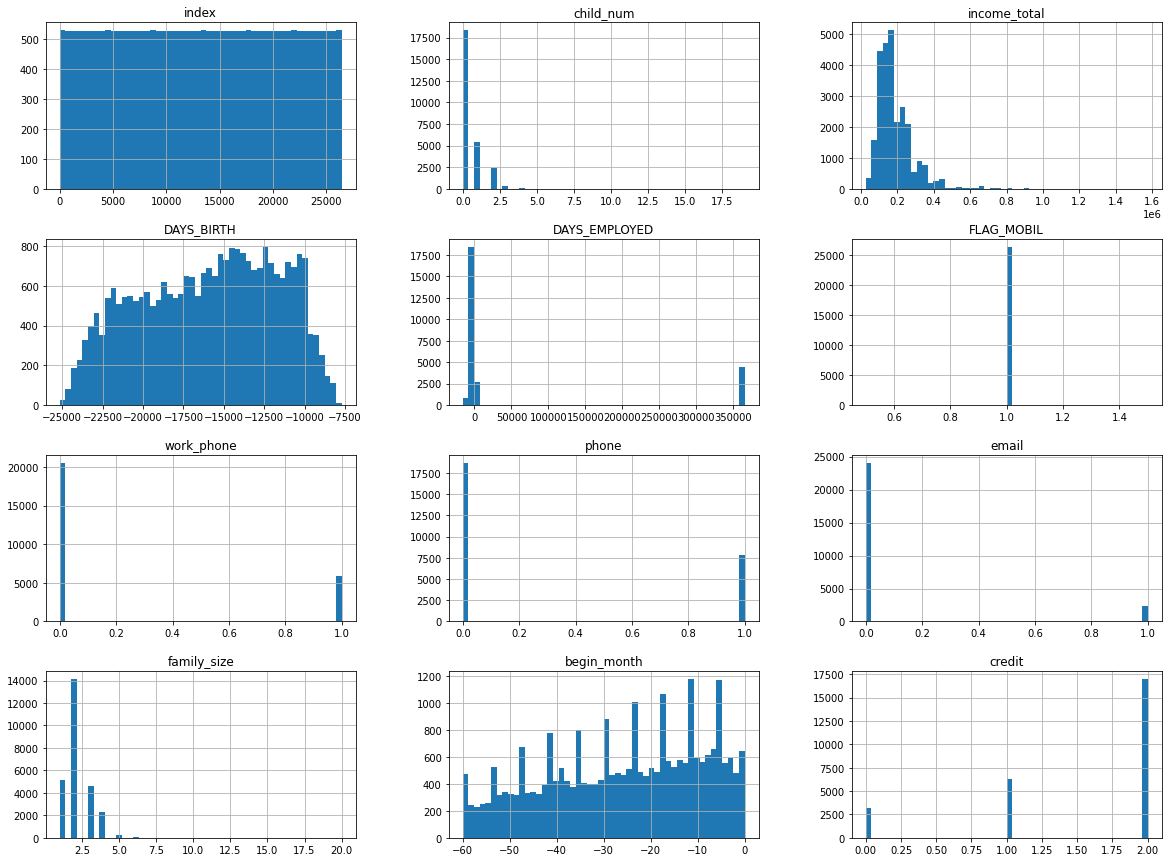

In [4]:
#각 데이터의 분포를 살펴보고자 함.
%matplotlib inline

card_train.hist(bins = 50, figsize=(20,15))
plt.show()

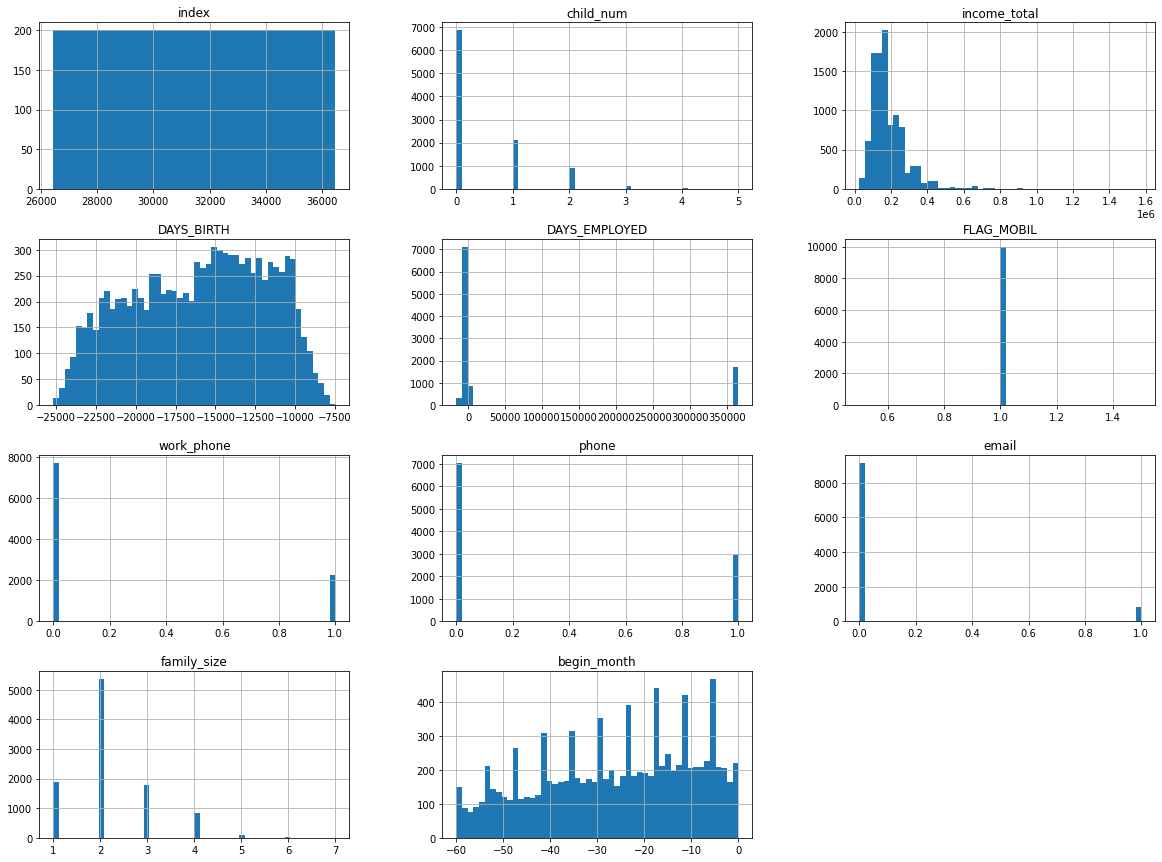

In [4]:
card_test.hist(bins = 50, figsize=(20,15))
plt.show()

* index  
* gender: 성별  
* car: 차량 소유 여부  
* reality: 부동산 소유 여부  
* child_num: 자녀 수  
* income_total: 연간 소득  
* income_type: 소득 분류  
* edu_type: 교육 수준  
* family_type: 결혼 여부  
* house_type: 생활 방식  
* DAYS_BIRTH: 출생일  
* DAYS_EMPLOYED: 업무 시작일  
* FLAG_MOBIL: 핸드폰 소유 여부  
* work_phone: 업무용 전화 소유 여부  
* phone: 전화 소유 여부  
* email: 이메일 소유 여부  
* occyp_type: 직업 유형  													
* family_size: 가족 규모  
* begin_month: 신용카드 발급 월  
* credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도  

출처 : https://dacon.io/competitions/official/235713/talkboard/402821?page=1&dtype=recent

In [5]:
dr_train = card_train[['car','reality','income_total','DAYS_BIRTH','begin_month','credit']]
dr_test = card_test[['car','reality','income_total','DAYS_BIRTH','begin_month']]

In [6]:
dr_train.head()

,car,reality,income_total,DAYS_BIRTH,begin_month,credit
0,N,N,202500.0,-13899,-6.0,1.0
1,N,Y,247500.0,-11380,-5.0,1.0
2,Y,Y,450000.0,-19087,-22.0,2.0
3,N,Y,202500.0,-15088,-37.0,0.0
4,Y,Y,157500.0,-15037,-26.0,2.0


In [7]:
dr_test.head()

,car,reality,income_total,DAYS_BIRTH,begin_month
0,Y,N,112500.0,-21990,-60.0
1,N,Y,135000.0,-18964,-36.0
2,N,Y,69372.0,-15887,-40.0
3,Y,N,112500.0,-19270,-41.0
4,Y,Y,225000.0,-17822,-8.0


In [14]:
dr_train["car"] = dr_train["car"].replace(['N','Y'], [0,1])
dr_test["car"] = dr_test["car"].replace(['N','Y'], [0,1])

C:\Users\lumit\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lumit\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
dr_train["reality"] = dr_train["reality"].replace(['N','Y'],[0,1])
dr_test["reality"] = dr_test["reality"].replace(['N','Y'],[0,1])

C:\Users\lumit\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lumit\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
#문자열을 숫자형으로 인코딩 해준 것을 확인
dr_test.head()

,car,reality,income_total,DAYS_BIRTH,begin_month
0,1,0,112500.0,-21990,-60.0
1,0,1,135000.0,-18964,-36.0
2,0,1,69372.0,-15887,-40.0
3,1,0,112500.0,-19270,-41.0
4,1,1,225000.0,-17822,-8.0


In [17]:
#X_train, y_train, X_test 로 나누었음 -> pre_test에는 정답값이 없기에 y_test는 없음
#현재 가변수들이 만들어졌으므로 타깃을 X_test에 맞춰서 drop 한 것을 X_train으로 함
X_train = dr_train.drop(['credit'], axis = 1)
X_test = dr_test
y_train = dr_train['credit']

print("X_train의 shape: ", X_train.shape)
print("X_test의 shape: ", X_test.shape)
print("y_train의 shape: ", y_train.shape)

X_train의 shape:  (26457, 5)
X_test의 shape:  (10000, 5)
y_train의 shape:  (26457,)


## --------------MLPClassifier--------------------------------------------------------------------------------

In [20]:
from sklearn.neural_network import MLPClassifier

mlp_1 = MLPClassifier(random_state=42, max_iter=10000)

mlp_1_param_grid = {'alpha': [0.0001, 0.01, 0.1], 'learning_rate_init': [0.001,0.01,0.03,0.05,0.01], 'solver':['adam','lbfgs','sgd'],
                  'activation': ['identity', 'logistic', 'tanh', 'relu']}

In [21]:
mlp_1_grid = GridSearchCV(mlp_1, param_grid = mlp_1_param_grid, scoring ='accuracy', n_jobs=-1, verbose=1)

mlp_1_grid.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(estimator=MLPClassifier(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.01, 0.1],
                         'learning_rate_init': [0.001, 0.01, 0.03, 0.05, 0.01],
                         'solver': ['adam', 'lbfgs', 'sgd']},
             scoring='accuracy', verbose=1)

In [22]:
print('최적 하이퍼 파라미터: \n', mlp_1_grid.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(mlp_1_grid.best_score_))

최적 하이퍼 파라미터: 
 {'activation': 'relu', 'alpha': 0.01, 'learning_rate_init': 0.001, 'solver': 'adam'}
최고 예측 정확도: 0.6416


## ---------------------RandomForest---------------------------------------

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
randf = RandomForestClassifier(criterion='entropy',oob_score=True,random_state=42)

gbm_param_grid = { 'n_estimators' : [50,100,200], 'max_depth' : [1,2,3,4,5], 'min_samples_leaf': [3,5,7,10],
                   'min_samples_split' : [2, 3, 5, 10]}

In [24]:
randf_grid = GridSearchCV(randf, param_grid = gbm_param_grid, scoring ='accuracy', n_jobs=-1, verbose=1)
randf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [25]:
print(randf_grid.best_params_)
print(randf_grid.best_score_)

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
0.6910079838651267


In [29]:
randf_clf = RandomForestClassifier(criterion = 'entropy', max_depth=5, min_samples_leaf= 3, min_samples_split= 2,
                                   n_estimators = 100, oob_score=True, random_state=42)

In [31]:
#log_loss = 0.8166 
#정확도는 향상되었는데 log_loss는 아직 개선이 안된듯함
randf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       oob_score=True, random_state=42)

In [32]:
train_proba = randf_clf.predict_proba(X_train)
train_proba[10:]

array([[0.11036832, 0.19050543, 0.69912626],
       [0.11340028, 0.2060653 , 0.68053442],
       [0.11328883, 0.20482264, 0.68188853],
       ...,
       [0.11078837, 0.21029002, 0.67892161],
       [0.10230705, 0.23013992, 0.66755302],
       [0.10975326, 0.19352794, 0.6967188 ]])

In [33]:
np.argmax(train_proba, axis = 1)[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [34]:
randf_clf.predict_proba(X_test)

sample_submission.iloc[:,1:]=randf_clf.predict_proba(X_test)
sample_submission

,index,0,1,2
0,26457,0.110542,0.182361,0.707096
1,26458,0.109887,0.191566,0.698547
2,26459,0.111553,0.188023,0.700424
3,26460,0.111299,0.185504,0.703197
4,26461,0.120514,0.203513,0.675973
...,...,...,...,...
9995,36452,0.112216,0.193964,0.693820
9996,36453,0.109014,0.212778,0.678207
9997,36454,0.111760,0.185993,0.702247
9998,36455,0.110006,0.185179,0.704815


In [35]:
sample_submission.to_csv("sample_submission_ver20_.csv", index =False)

In [26]:
rf = RandomForestClassifier(random_state=42)

rf_param_grid = { 'criterion':['gini', 'entropy'], 'n_estimators' : [50,100,200,300], 'max_depth' : [3,4,5,6,7],
                  'min_samples_split' : [2, 3, 5, 7, 9 ], 'max_leaf_nodes' : [1,2,3,4,5], 'oob_score' : [True, False],
                  'max_features' : ['auto', 'squrt', 'log2']}

In [27]:
rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, scoring ='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits


C:\Users\lumit\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.69093238 0.69093238 0.69093238]
  category=UserWarning


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'squrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 5, 7, 9],
                         'n_estimators': [50, 100, 200, 300],
                         'oob_score': [True, False]},
             scoring='accuracy', verbose=1)

In [28]:
print('최적 하이퍼 파라미터: \n', rf_grid.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(rf_grid.best_score_))

최적 하이퍼 파라미터: 
 {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': 2, 'min_samples_split': 2, 'n_estimators': 50, 'oob_score': True}
최고 예측 정확도: 0.6909


## -------------------Pipeline------------------------------------------------

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [56]:
param_grid = {'gb__n_estimators' : [50,100,200,300,400,500], 'gb__max_depth' : [1,2,3,4,5,6,7], 
              'gb__learning_rate': [0.001, 0.01, 0.03, 0.05]}
pipe = Pipeline([("scaler", MinMaxScaler()), ("gb",GradientBoostingClassifier())])

In [57]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('gb', GradientBoostingClassifier())]),
             param_grid={'gb__learning_rate': [0.001, 0.01, 0.03, 0.05],
                         'gb__max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'gb__n_estimators': [50, 100, 200, 300, 400, 500]})

In [60]:
print("최상의 교차 검증 정확도:{:.2f}".format(grid.best_score_))
print("최적의 매개변수:{}".format(grid.best_params_))

최상의 교차 검증 정확도:0.70
최적의 매개변수:{'gb__learning_rate': 0.05, 'gb__max_depth': 7, 'gb__n_estimators': 500}


In [61]:
train_proba = grid.predict_proba(X_train)
train_proba[10:]

array([[0.10757272, 0.14269077, 0.74973651],
       [0.11443164, 0.08308737, 0.802481  ],
       [0.3059745 , 0.06140723, 0.63261827],
       ...,
       [0.03239677, 0.06119831, 0.90640492],
       [0.01664756, 0.07313387, 0.91021856],
       [0.05552776, 0.15673223, 0.78774002]])

In [62]:
np.argmax(train_proba, axis = 1)[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [63]:
grid.predict_proba(X_test)

sample_submission.iloc[:,1:]=grid.predict_proba(X_test)
sample_submission

,index,0,1,2
0,26457,0.043715,0.049884,0.906401
1,26458,0.228583,0.236467,0.534950
2,26459,0.039892,0.241208,0.718900
3,26460,0.093111,0.151343,0.755546
4,26461,0.073679,0.258247,0.668074
...,...,...,...,...
9995,36452,0.077730,0.287663,0.634607
9996,36453,0.157948,0.376496,0.465556
9997,36454,0.034600,0.106367,0.859033
9998,36455,0.089430,0.190619,0.719952


In [64]:
#logloss = 0.7617264695 로 가장 높은 성능이 나옴!!
sample_submission.to_csv("sample_submission_ver22_.csv", index =False)

In [69]:
gb = GradientBoostingClassifier(learning_rate = 0.05, max_depth = 7, n_estimators = 500, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=7, n_estimators=500,
                           random_state=42)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(14881, 5) (4961, 5) (14881,) (4961,)


In [72]:
y_pred =  gb.predict(X_val)

In [73]:
y_pred

array([2., 2., 2., ..., 2., 2., 0.])

In [74]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_val, y_pred)
print("오차 행렬: \n", confusion)

오차 행렬: 
 [[ 238   19  347]
 [   7  623  545]
 [   2    8 3172]]


In [75]:
target_names = ["credit=0", "credit=1", "credit=2"]

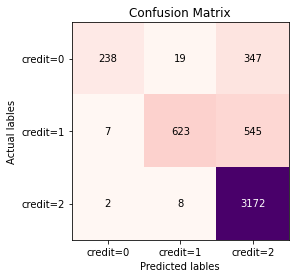

In [76]:
#ver3과 오차행렬을 비교해보았을 때, 실제로 0인 클래스를 0으로 예측하는 비율이 크게 높아졌고(17->238) 
#이로인해 정확도에 대한 성능이 높아졌음을 확인함.
#하지만 아직도 0인 클래스를 2로 분류하는 현상이 발생하며 원인이 무엇인지에 대한 분석이 필요해보임.

scores_image = mglearn.tools.heatmap(confusion, xlabel='Predicted lables', ylabel='Actual lables',
                                     xticklabels=target_names, yticklabels=target_names, cmap='RdPu', fmt="%d")
plt.title("Confusion Matrix")
plt.gca().invert_yaxis()

In [77]:
#점수적인 측면으로 보았을 때도, 많은 부분이 향상되었음을 알 수 있음.
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

         0.0       0.39      0.96      0.56       247
         1.0       0.53      0.96      0.68       650
         2.0       1.00      0.78      0.88      4064

    accuracy                           0.81      4961
   macro avg       0.64      0.90      0.71      4961
weighted avg       0.91      0.81      0.83      4961



## 최종 고찰  
* 처음에는 모든 변수를 고려해서 클래스를 분류하는 것이 가장 좋은 방법이 아닐까라는 생각으로 접근했음.  
* 여러 전처리를 해본 결과 클래스가 어떤 변수에 큰 영향을 받는지에 대한 분석력도 중요하다고 생각됨.  
* 그 결과 그동안의 결과보다 높은 정확도와 오차행렬을 보았을 때, 성능이 많이 향상됨을 보여주고 있음.  
* **실제로 프로젝트를 수행해보며, 기계학습에 대한 이해도를 높일 수 있었고 성능을 향상시킨다는 것이 어렵지만 뿌듯한 일이라는 것을 느끼게 됨**
